# Patch Duration vs. Morphological Calls(63x) per Post Patch Outcomes

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import post_patch as pp #post patch script
#post_patch_column = 'postPatch_label'
#post_patch_pipette_column = 'endPipetteR_label'

#sns.set_style('whitegrid') #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context('notebook')

In [2]:
#Reading the CSVs
morph_df = pd.read_csv("C:/users/kumar/allen-institute/personal-projects/csv/63x.csv")
shiny_df = pd.read_csv("C:/users/kumar/allen-institute/personal-projects/csv/shiny_mouse.csv")
ps_df = pd.read_csv("C:/users/kumar/allen-institute/personal-projects/csv/patch_seq_log_mouse.csv")

#Creating ps_df
ps_df = ps_df.loc[:,['Lims tube id',
                  'patch duration',
                  'Time spent extracting cytosol',
                  'Time spent retracting pipette']]

#Creating shiny_df
shiny_df = shiny_df.loc[:,['sample_id',
                        'postPatch_label',
                        'endPipetteR_label']]

#Creating morph_df
morph_df = morph_df.loc[:,['patched_cell_container',
                        'ims63x_go_no_go']]

#Merging ps_df with shiny_df
shiny_ps_df = pd.merge(left = shiny_df, 
                       right = ps_df, 
                       left_on = 'sample_id', 
                       right_on = 'Lims tube id', 
                       how = 'inner')

#Merging morph_df with shiny_ps_df 
final_df = pd.merge(left = morph_df, 
                    right = shiny_ps_df, 
                    left_on = 'patched_cell_container', 
                    right_on = 'sample_id', 
                    how = 'inner')

In [3]:
#Getting date from patched cell container
final_df['Date'] = final_df['patched_cell_container'].str[5:11]

#Changing to string to add 20 in front of strings within date column
final_df['Date'] = final_df['Date'].astype('str')
final_df['Date'] = '20' + final_df['Date']
final_df['Date'] = pd.to_datetime(final_df['Date']) #Converting date to YYYY-MM-DD

final_df = final_df.set_index('Date') #Set date column as index column

#start_date = input('Enter the start date for your dataframe (YYYY-MM-DD): ')
#Production Date Start = '2017-10-01' 
start_date = '2017-10-01'
final_df = final_df[start_date:] #Choosing start & end date    

final_df = pp.postpatch_reclass(final_df)

C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
final_df.rename(columns = {'ims63x_go_no_go' : 'morph',
                           'patch duration' : 'patch_dur', 
                           'Time spent extracting cytosol' : 'ext_dur',
                           'Time spent retracting pipette' : 'ret_dur'}, inplace = True)

final_df.drop(['patched_cell_container', 'sample_id', 'Lims tube id'], axis=1, inplace=True)
final_df.dropna(subset = ['morph'], inplace = True)

#Categorical
final_df['morph'] = final_df['morph'].astype('category')
final_df['post_patch'] = final_df['post_patch'].astype('category')

#Numerical
final_df['patch_dur'] = final_df['patch_dur'].astype('float')

final_df.sort_index(inplace = True) 

In [5]:
final_df.head()

morph  postPatch_label  endPipetteR_label  patch_dur  \
Date                                                                   
2017-10-02     63x go        Nucleated                0.0   5.333333   
2017-10-02     63x go        Nucleated                0.0        NaN   
2017-10-02     63x go        Nucleated                0.0        NaN   
2017-10-02  63x no go   nucleus_absent               10.2  11.866667   
2017-10-02  63x no go  nucleus_present             1000.0   7.283333   

                ext_dur      ret_dur     post_patch  
Date                                                 
2017-10-02   0.61666667          NaN  Nuc-high seal  
2017-10-02          NaN          NaN  Nuc-high seal  
2017-10-02          NaN          NaN  Nuc-high seal  
2017-10-02  0.333333333            2    No-low seal  
2017-10-02  0.283333333  1.766666667  Nuc-high seal

In [6]:
final_df.tail()

morph  postPatch_label  endPipetteR_label  patch_dur  \
Date                                                                   
2018-03-05  63x no go  nucleus_present                8.0  18.383333   
2018-03-06  63x no go  nucleus_present                4.0  20.433333   
2018-03-06     63x go  nucleus_present             2500.0  15.550000   
2018-03-06  63x no go  nucleus_present             1500.0   8.850000   
2018-03-06     63x go  nucleus_present             2000.0   9.933333   

                ext_dur      ret_dur     post_patch  
Date                                                 
2018-03-05  0.666666667  1.633333333   Nuc-low seal  
2018-03-06          0.9  0.016666667   Nuc-low seal  
2018-03-06         0.75         3.85  Nuc-high seal  
2018-03-06         0.75  3.433333333  Nuc-high seal  
2018-03-06            1  3.533333333  Nuc-high seal

##### Info

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 818 entries, 2017-10-02 to 2018-03-06
Data columns (total 7 columns):
morph                818 non-null category
postPatch_label      818 non-null object
endPipetteR_label    818 non-null float64
patch_dur            812 non-null float64
ext_dur              812 non-null object
ret_dur              809 non-null object
post_patch           818 non-null category
dtypes: category(2), float64(2), object(3)
memory usage: 40.2+ KB


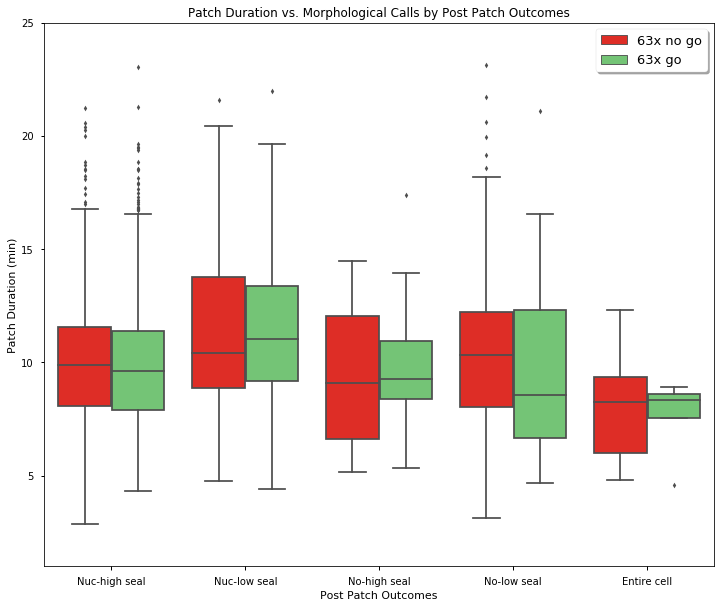

In [8]:
plt.subplots(figsize=(12,10)) #Has to be before the plot to work

bp = sns.boxplot(x = 'post_patch', 
            y = 'patch_dur', 
            hue = 'morph',
            order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal','Entire cell'],
            hue_order = ['63x no go','63x go'],
            data = final_df,
            palette = ['#de2d26', '#74c476'],
            saturation = 1,
            fliersize = 4)

bp.legend(loc = 0, 
          #bbox_to_anchor = (0.95, 1), 
          frameon = True, 
          shadow = True,
          fontsize = 13)
bp.set(ylim=(1, 25))

bp.set_title('Patch Duration vs. Morphological Calls by Post Patch Outcomes')
bp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Patch Duration (min)')
plt.savefig('Boxplot_PD_vs_M_by_PP')